## Hard-coded solution for Mountain Car

Observation space: Box(2,)
Action space: Discrete(3)


<IPython.core.display.Javascript object>


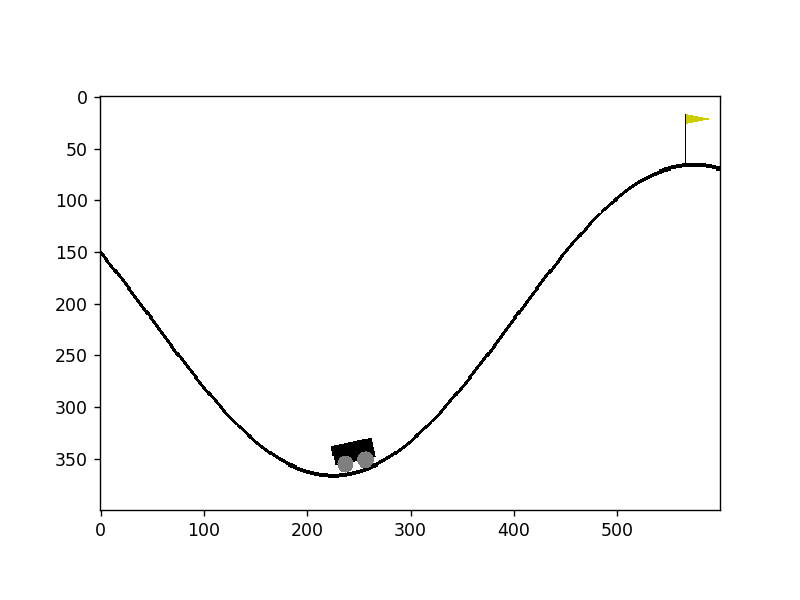

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import os
import gym

env = gym.make("MountainCar-v0")
env.reset()
plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
ax.clear()
ax.imshow(env.render('rgb_array'))
fig.canvas.draw()

env.close()



initial observation code: [-0.550119  0.      ]
taking action 2 (right)
new observation code: [-0.54892031  0.00119869]
reward: -1.0
is game over?: False


<IPython.core.display.Javascript object>


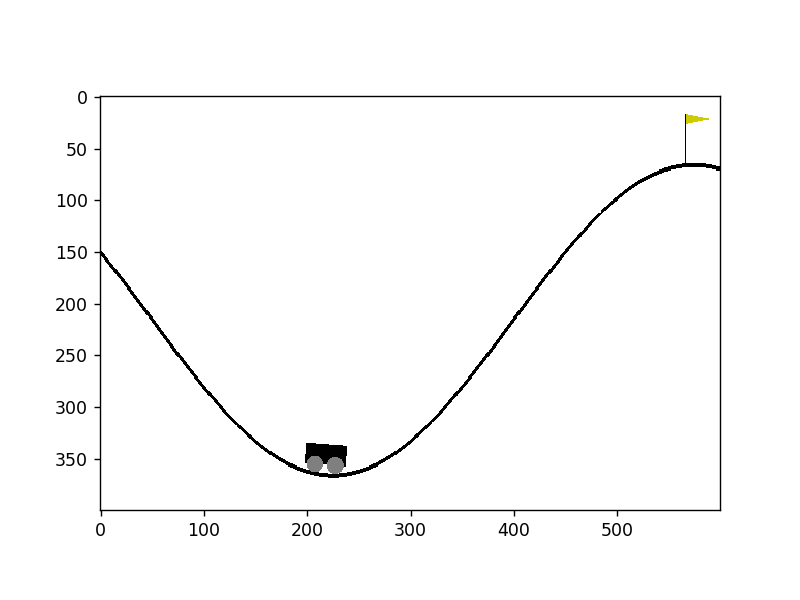

In [6]:
obs0 = env.reset()
print("initial observation code:", obs0)

print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
ax.clear()
ax.imshow(env.render('rgb_array'))
fig.canvas.draw()

env.close()


<IPython.core.display.Javascript object>


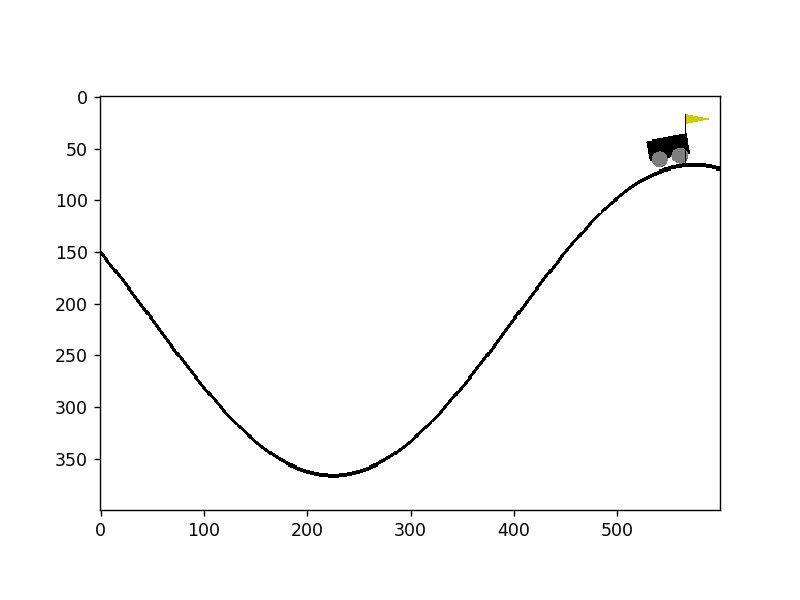

time 0 action 0 postion -0.5594827287356697 velocity -0.0007368851684559195
time 1 action 0 postion -0.5609510037749255 velocity -0.0014682750392556784
time 2 action 0 postion -0.5631397230108119 velocity -0.0021887192358864514
time 3 action 0 postion -0.5660325801464966 velocity -0.0028928571356846714
time 4 action 0 postion -0.5696080426360588 velocity -0.003575462489562207
time 5 action 0 postion -0.5738395302715117 velocity -0.004231487635452895
time 6 action 0 postion -0.5786956372889486 velocity -0.004856107017436853
time 7 action 0 postion -0.5841403969001342 velocity -0.005444759611185603
time 8 action 0 postion -0.5901335866400895 velocity -0.005993189739955311
time 9 action 0 postion -0.5966310722965728 velocity -0.006497485656483212
time 10 action 0 postion -0.6035851874741738 velocity -0.00695411517760098
time 11 action 0 postion -0.6109451450761579 velocity -0.007359957601984137
time 12 action 0 postion -0.6186574762031032 velocity -0.007712331126945272
time 13 action 0 po

time 109 action 2 postion -0.7811882392411353 velocity -0.012458902209685714
time 110 action 2 postion -0.7909018413860973 velocity -0.009713602144962022
time 111 action 2 postion -0.797818731197783 velocity -0.006916889811685733
time 112 action 2 postion -0.8019032263626225 velocity -0.004084495164839443
time 113 action 2 postion -0.803134625645118 velocity -0.0012313992824954378
time 114 action 2 postion -0.8015067424529815 velocity 0.0016278831921364787
time 115 action 2 postion -0.7970277607135372 velocity 0.004478981739444279
time 116 action 2 postion -0.7897204250574826 velocity 0.007307335656054516
time 117 action 2 postion -0.7796225494487178 velocity 0.010097875608764887
time 118 action 2 postion -0.7667878005251842 velocity 0.01283474892353351
time 119 action 2 postion -0.7512866841823297 velocity 0.015501116342854566
time 120 action 2 postion -0.7332076369924746 velocity 0.018079047189855126
time 121 action 2 postion -0.712658099301863 velocity 0.020549537690611644
time 122 

time 220 action 2 postion -0.38986634857303626 velocity 0.043584260733420574
time 221 action 2 postion -0.34625838991919294 velocity 0.043607958653843336
time 222 action 2 postion -0.3029186217054229 velocity 0.04333976821377006
time 223 action 2 postion -0.26011567230010046 velocity 0.042802949405322435
time 224 action 2 postion -0.2180893965081998 velocity 0.042026275791900644
time 225 action 2 postion -0.1770468544783499 velocity 0.04104254202984993
time 226 action 2 postion -0.1371598872399732 velocity 0.039886967238376696
time 227 action 2 postion -0.09856424503183792 velocity 0.03859564220813527
time 228 action 2 postion -0.061360104091360806 velocity 0.03720414094047711
time 229 action 2 postion -0.025613725671581808 velocity 0.035746378419779
time 230 action 2 postion 0.00864002982536135 velocity 0.03425375549694316
time 231 action 2 postion 0.04139462508908447 velocity 0.032754595263723124
time 232 action 2 postion 0.07266847263550726 velocity 0.03127384754642278
time 233 acti

In [9]:
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(t,s):
    position = s[0]
    velocity = s[1]
#Initially we go left till we reach max possible on 'left' hill. To reach the max possible height from initial state it takes 30 times steps    
    if t < 30:
        return actions['left']
#When starting to fall off 'right' hill we need to go left. Just when we start to fall, velocity goes negative    
    if velocity < 0 and position > 0:
        return actions['left']
    
    return actions['right']


for t in range(TIME_LIMIT):
    
    # change the line below to reach the flag
    action = policy(t,s)
    s, r, done, _ = env.step(action)
    print("time",t,"action",action,'postion',s[0],"velocity",s[1])
    
    #draw game image on display
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Well done!")
        break
else:    
    print("Time limit exceeded. Try again.")
env.close()
